In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Toyota = data.DataReader("TM", data_source="yahoo", start = "1976-08-01", end = "2019-06-01")
Toyota.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1976-08-18,2.562200,2.562200,2.562200,2.562200,19500.0,1.510903
1976-08-19,2.549578,2.549578,2.549578,2.549578,500.0,1.503460
1976-08-20,2.536956,2.536956,2.536956,2.536956,8000.0,1.496017
1976-08-23,2.461226,2.461226,2.461226,2.461226,1000.0,1.451360
1976-08-24,2.435982,2.435982,2.435982,2.435982,7500.0,1.436473


In [3]:
Toyota.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-20,118.790001,117.879997,118.120003,118.110001,156300.0,118.110001
2019-05-21,118.389999,117.459999,117.849998,118.250000,124300.0,118.250000
2019-05-22,117.980003,117.269997,117.779999,117.320000,107600.0,117.320000
2019-05-23,117.860001,117.050003,117.379997,117.470001,116500.0,117.470001
2019-05-24,118.879997,118.040001,118.839996,118.550003,120743.0,118.550003


In [4]:
Toyota.shape

(10786, 6)

In [5]:
Toyota_train = Toyota.iloc[:10600, :]
Toyota_train.shape

(10600, 6)

In [6]:
Toyota_test = Toyota.iloc[10600:, :]
Toyota_test.shape

(186, 6)

In [7]:
training_set = Toyota.iloc[:10600, 2:3].values
training_set

array([[  2.56220007],
       [  2.54957819],
       [  2.53695607],
       ...,
       [123.23999786],
       [123.01999664],
       [125.61000061]])

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 9999):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1, activation='sigmoid'))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fitting the RNN to the Training set using Keras Callbacks
es = EarlyStopping(monitor='loss', mode='min', min_delta=1e-10, patience=5, verbose=1)
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')
history = regressor.fit(X_train, y_train, shuffle=True, epochs = 50, callbacks=[es, rlr,mcp, tb],batch_size = 128)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Christy\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
9939/9939 [==============================] - 34s 3ms/step - loss: 0.0165

Epoch 00001: loss improved from inf to 0.01648, saving model to weights.h5
Epoch 2/50
9939/9939 [==============================] - 29s 3ms/step - loss: 0.0010

Epoch 00002: loss improved from 0.01648 to 0.00103, saving model to weights.h5
Epoch 3/50
9939/9939 [==============================] - 29s 3ms/step - loss: 8.2470e-04

Epoch 00003: loss improved from 0.00103 to 0.00082, saving model to weights.h5
Epoch 4/50
9939/9939 [==============================] - 29s 3ms/step - loss: 7.9555e-04

Epoch 00004: loss improved from 0.00082 to 0.00080, saving model to weights.h5
Epoch 5/50
9939/9939 [==============================] - 29s 3ms/step - loss: 7.5468e-04

Epoch 00005: loss improved from 0.00080 to 0.00075, saving model to weights.h5
Epoch 6/50
9939/9939 [==============================] - 29s 3ms/step - loss: 7.3237e-04

Epoch 00006: loss improved from 0.0

9939/9939 [==============================] - 29s 3ms/step - loss: 4.5460e-04

Epoch 00049: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 00049: loss did not improve from 0.00045
Epoch 50/50
9939/9939 [==============================] - 29s 3ms/step - loss: 4.5874e-04

Epoch 00050: loss did not improve from 0.00045


In [10]:
# Part 3 - Making the predictions and visualising the results

# Getting the real recent stock price until May 2019
real_stock_price = Toyota_test.iloc[:, 2:3].values

In [11]:
# Getting the predicted stock price until May 2019
Toyota_total = pd.concat((Toyota_train['Close'], Toyota_test['Close']), axis = 0)
inputs = Toyota_total[len(Toyota_total) - len(Toyota_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 246):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

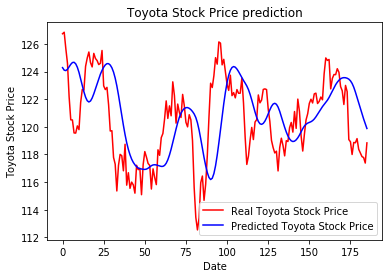

In [12]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Toyota Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Toyota Stock Price')
plt.title('Toyota Stock Price prediction')
plt.xlabel('Date')
plt.ylabel('Toyota Stock Price')
plt.legend()
plt.show()

In [13]:
#Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

2.9797294162647763

In [14]:
min_val=min(real_stock_price)
max_val=max(real_stock_price)
print ("relative error: ", rmse/(max_val-min_val))

relative error:  [0.20822711]


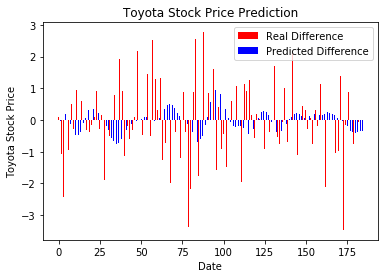

In [15]:
# Visualising the results
 
shift_pred= predicted_stock_price[:-1]
shift_pred = np.append(0, np.reshape(shift_pred, len(shift_pred)))
shift_real = real_stock_price[:-1]
shift_real = np.append(0, np.reshape(shift_real, len(shift_real)))
 
dif_pred = np.add(np.reshape(predicted_stock_price, len(predicted_stock_price)), - shift_pred)[1:]
dif_real = np.add(np.reshape(real_stock_price, len(real_stock_price)), - shift_real)[1:]
 
fig, ax = plt.subplots()
ind = np.arange(dif_real.size)
real_bar = ax.bar(ind-0.15, dif_real, width=0.3, color = 'red', label = 'Real Difference')
pred_bar = ax.bar(ind+0.15, dif_pred, width=0.3, color = 'blue', label = 'Predicted Difference')
ax.set_title('Toyota Stock Price Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Toyota Stock Price')
ax.legend()
plt.show()